In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the training and testing data
train_dataset = pd.read_csv("../data_sets/bitext/triage-train-dataset.csv")
test_dataset = pd.read_csv("../data_sets/bitext/triage-test-dataset.csv")

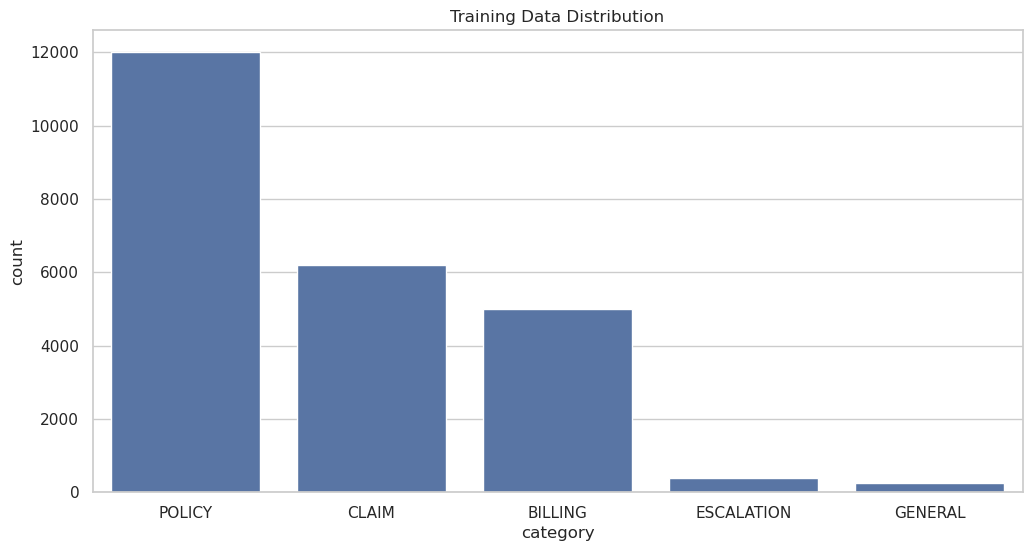

In [3]:
# plot training data distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=train_dataset["category"])
plt.title("Training Data Distribution")
plt.show()

### Training data distribution is unbalance, with the `ESCALATION` and `GENERAL` class being underrepresented.

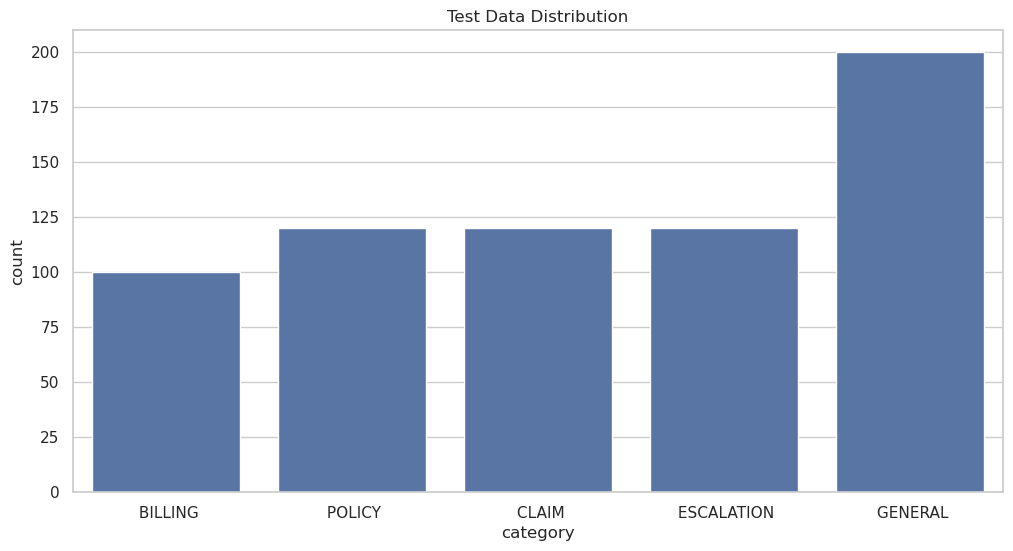

In [4]:
# plot test data distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=test_dataset["category"])
plt.title("Test Data Distribution")
plt.show()

### Test data is more balanced. In the test dataset the `GENERAL` class has the highest number of samples in contrast to the training dataset, where the `GENERAL` class is the most underrepresented class.

# Message embeddings visualization

Let's use the SentenceTransformer model [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084) in order to compute the embeddings of the training and test instructions. We will use the `all-MiniLM-L12-v2` model, which is a smaller and faster version of the original BERT model. This model is trained on a large corpus of data and is able to produce high-quality sentence embeddings.

In [5]:
# compute embeddings of the training instructions
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L12-v2")
train_embeddings = model.encode(train_dataset["instruction"].values)


/home/adrian/miniconda3/envs/triage-agent-classifier/lib/python3.13/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
print(train_embeddings.shape)

(23850, 384)


In [7]:
# compute embeddings of the test instructions
test_embeddings = model.encode(test_dataset["instruction"].values)

In [8]:
print(test_embeddings.shape)

(660, 384)


### Let's visualize the embeddings of the training set instructions using t-SNE.

In [9]:
# compute tsne of the training embeddings
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(train_embeddings)

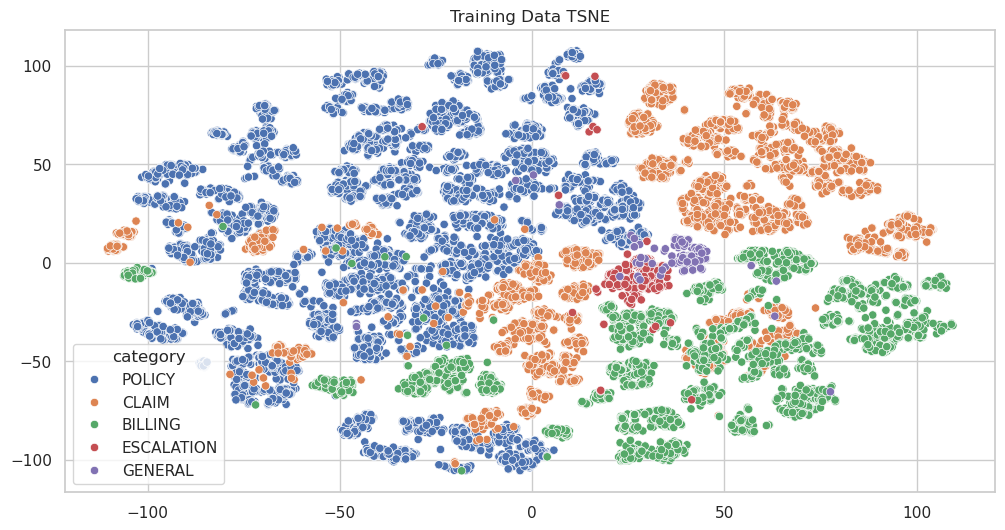

In [10]:
# plot tsne of the training embeddings together with the categories
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=train_dataset["category"])
plt.title("Training Data TSNE")
#plt.show()
# save the plot
plt.savefig("training_data_tsne.png", dpi=300)